In [14]:
import math
import itertools
import numpy as np
import numpy.linalg as la
import networkx as nx
import networkx.algorithms as algs
import matplotlib.pyplot as plt

In [2]:
def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

In [30]:
def get_average_dist(adjacency_matrix, nodes):
    graph = nx.from_numpy_array(adjacency_matrix)
    subgraphs = [graph.subgraph(c).copy() for c in algs.connected_components(graph)]
    pathsums = [1]
    for subgraph_connected in subgraphs:
        pathsums.append(nx.average_shortest_path_length(subgraph_connected))
    return sum(pathsums)/len(pathsums)
#     paths = dict(nx.all_pairs_shortest_path(graph))
#     print(paths)
#     pathsum = 0
#     for i in range(nodes):
#         for j in range(nodes):
#             pathsum += sum(paths[i][j])
#     average_dist = pathsum/max_l
#     return average_dist

In [31]:
def get_density(adjacency_matrix, nodes):
    density_sum = 0
    for i in range(adjacency_matrix.shape[0]):
        for j in range(adjacency_matrix.shape[1]):
            if i < j:
                density_sum += adjacency_matrix[i][j]
    density = density_sum/nCr(nodes, 2)
    return density

In [32]:
def cost(nodes, alpha, adjacency_matrix):
    return alpha*get_average_dist(adjacency_matrix, nodes) + (1-alpha)*get_density(adjacency_matrix, nodes)


In [7]:
nodes = 5
alpha = 0.5

In [8]:
combinations = itertools.combinations_with_replacement([0,1], nodes)
permutations = []
for item in combinations:
    permutations += itertools.permutations(item)
raw_matrices = list(itertools.permutations(set(permutations), nodes))

In [10]:
matrices = []
for raw_matrix in raw_matrices:
    matrix = []
    for raw_row in raw_matrix:
        matrix.append(list(raw_row))
    matrices.append(matrix)
matrices[0]

[[1, 1, 1, 0, 0],
 [0, 1, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [1, 0, 1, 1, 0],
 [0, 0, 0, 0, 0]]

In [11]:
costs = [[], []]

for matrix in matrices:
    adjacency_matrix = np.array(matrix)
    costs[0].append(adjacency_matrix)
    costs[1].append(cost(nodes, alpha, adjacency_matrix))

In [12]:
min_cost = min(costs[1])
low_i = costs[1].index(min_cost)
print(min_cost)
costs[0][low_i]

0.0


array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [13]:
all_costs = sorted(costs[1])

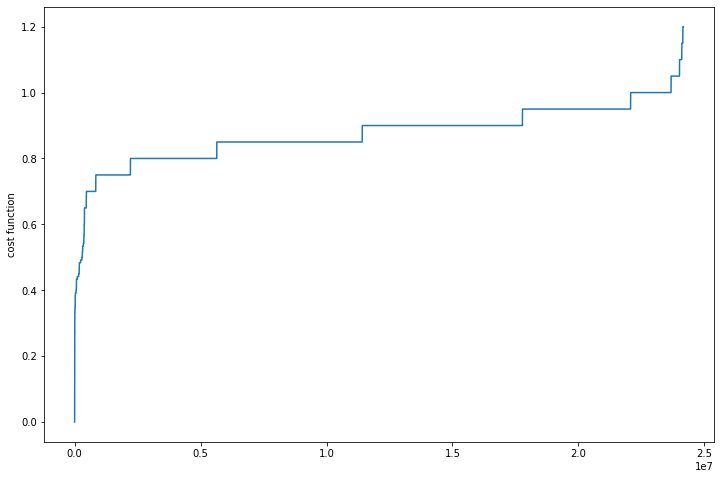

In [34]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(all_costs)
plt.ylabel('cost function')
plt.show()